# Checklist Credit
---

Complete credit goes to Aurélien Géron and his awesome book [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/). The book goes into detail on all the topics mentioned in the checklist. I highly recommend you check it out.

# First, the full checklist in one cell for a quick overview
---

This checklist can guide you through your Machine Learning projects. There are eight main steps: 
1. Frame the problem and look at the big picture.
2. Get the data.
3. Explore the data to gain insights.
4. Prepare the data to better expose the underlying data patterns to Machine Learning algorithms.
5. Explore many different models and shortlist the best ones.
6. Fine-tune your models and combine them into a great solution.
7. Present your solution.
8. Launch, monitor, and maintain your system.

Obviously, you should feel free to adapt this checklist to your needs.

**Frame the Problem and Look at the Big Picture**

1. Define the objective in business terms.
2. How will your solution be used?
3. What are the current solutions/workarounds (if any)?
4. How should you frame this problem (supervised/unsupervised, online/offline, etc.)?
5. How should performance be measured?
6. Is the performance measure aligned with the business objective?
7. What would be the minimum performance needed to reach the business objective?
8. What are comparable problems? Can you reuse experience or tools?
9. Is human expertise available?
10. How would you solve the problem manually?
11. List the assumptions you (or others) have made so far.
12. Verify assumptions if possible.

Comments
- check the assumptions: don’t invest time solving a regression task (for example predicting house prices) when all that’s needed downstream in the data pipeline is a price class (“cheap”, “medium”, “expensive”)

**Get the Data**

Note: automate as much as possible so you can easily get fresh data.
1. List the data you need and how much you need.
2. Find and document where you can get that data.
3. Check how much space it will take.
4. Check legal obligations, and get authorization if necessary.
5. Get access authorizations.
6. Create a workspace (with enough storage space).
7. Get the data.
8. Convert the data to a format you can easily manipulate (without changing the data itself).
9. Ensure sensitive information is deleted or protected (e.g., anonymized).
10. Check the size and type of data (time series, sample, geographical, etc.).
11. Sample a test set, put it aside, and never look at it (no data snooping!).

**Explore the Data**

Note: try to get insights from a field expert for these steps.
1. Create a copy of the data for exploration (sampling it down to a manageable size if necessary).
2. Create a Jupyter notebook to keep a record of your data exploration.
3. Study each attribute and its characteristics:
  - Name
  - Type (categorical, int/float, bounded/unbounded, text, structured, etc.)
  - % of missing values
  - Noisiness and type of noise (stochastic, outliers, rounding errors, etc.)
  - Usefulness for the task
  - Type of distribution (Gaussian, uniform, logarithmic, etc.)
4. For supervised learning tasks, identify the target attribute(s).
5. Visualize the data.
6. Study the correlations between attributes.
7. Study how you would solve the problem manually.
8. Identify the promising transformations you may want to apply.
9. Identify extra data that would be useful (go back to “Get the Data” ).
10. Document what you have learned.

**Prepare the Data**

Notes: 

- Work on copies of the data (keep the original dataset intact).
- Write functions for all data transformations you apply, for five reasons:
  - So you can easily prepare the data the next time you get a fresh dataset
  - So you can apply these transformations in future projects
  - To clean and prepare the test set
  - To clean and prepare new data instances once your solution is live
  - To make it easy to treat your preparation choices as hyperparameters
 
1. Data cleaning:
- Fix or remove outliers (optional).
- Fill in missing values (e.g., with zero, mean, median…) or drop their rows (or columns).

2. Feature selection (optional):
- Drop the attributes that provide no useful information for the task.

3. Feature engineering, where appropriate:
- Discretize continuous features.
- Decompose features (e.g., categorical, date/time, etc.).
- Add promising transformations of features (e.g., log( x ), sqrt( x ), x 2 , etc.).
- Aggregate features into promising new features.

4. Feature scaling:
- Standardize or normalize features.

**Shortlist Promising Models**

Notes: 
- If the data is huge, you may want to sample smaller training sets so you can train many different models in a reasonable time (be aware that this penalizes complex models such as large neural nets or Random Forests).
- Once again, try to automate these steps as much as possible.
1. Train many quick-and-dirty models from different categories (e.g., linear, naive Bayes, SVM, Random Forest, neural net, etc.) using standard parameters.
2. Measure and compare their performance.
- For each model, use N fold cross-validation and compute the mean and standard deviation of the performance measure on the N folds.
3. Analyze the most significant variables for each algorithm.
4. Analyze the types of errors the models make.
- What data would a human have used to avoid these errors?
5. Perform a quick round of feature selection and engineering.
6. Perform one or two more quick iterations of the five previous steps.
7. Shortlist the top three to five most promising models, preferring models that make different types of errors.

**Fine-Tune the System**

Notes: 
- You will want to use as much data as possible for this step, especially as you move toward the end of fine-tuning.
- As always, automate what you can.
1. Fine-tune the hyperparameters using cross-validation:
- Treat your data transformation choices as hyperparameters, especially when you are not sure about them (e.g., if you’re not sure whether to replace missing values with zeros or with the median value, or to just drop the rows).
- Unless there are very few hyperparameter values to explore, prefer random search over grid search. If training is very long, you may prefer a Bayesian optimization approach (e.g., using Gaussian process priors, as described by Jasper Snoek et al. ). 2. Try Ensemble methods. Combining your best models will often produce better performance than running them individually.
3. Once you are confident about your final model, measure its performance on the test set to estimate the generalization error.

Warning
Don’t tweak your model after measuring the generalization error: you would just start overfitting the test set. 

**Present your solution**

1. Document what you have done.
2. Create a nice presentation.
- Make sure you highlight the big picture first.
3. Explain why your solution achieves the business objective.
4. Don’t forget to present interesting points you noticed along the way.
- Describe what worked and what did not.
- List your assumptions and your system’s limitations.
5. Ensure your key findings are communicated through beautiful visualizations or easy-to-remember statements (e.g., “the median income is the number-one predictor of housing prices”).

**Launch!**
1. Get your solution ready for production (plug into production data inputs, write unit tests, etc.).
2. Write monitoring code to check your system’s live performance at regular intervals and trigger alerts when it drops.
- Beware of slow degradation: models tend to “rot” as data evolves.
- Measuring performance may require a human pipeline (e.g., via a crowdsourcing service).
- Also monitor your inputs’ quality (e.g., a malfunctioning sensor sending random values, or another team’s output becoming stale). This is particularly important for online learning systems.
3. Retrain your models on a regular basis on fresh data (automate as much as possible ).

# My code

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
import subprocess
%matplotlib inline

In [142]:
def load_train_data(split=True):
    target = "Survived"
    data = pd.read_csv("./train.csv", index_col="PassengerId")
    print("load_train_data: done")
    
    if split:
        return split_features_target(data, target)
    else:
        return data
    
def split_features_target(df, target="Survived"):
    features = [column for column in df.columns if not column == target]
    return df[features], df[target]

def load_x_test():
    return pd.read_csv("./test.csv", index_col="PassengerId")

# Save Kaggle submission file
def submission_df(y_pred):
    X_test = load_x_test()
    return pd.DataFrame(y_pred, index=X_test.index, columns=["Survived"])

def save_submission_file(y_pred, filename):
    df = submission_df(y_pred)
    path = "./" + filename

    try:
        df.to_csv(path)
    except Exception:
        print("Couldn’t save submission.")
    else:
        print("Submission saved.")
        
# Submit score to Kaggle
def submit_predictions(y_pred, filename, message):
    save_submission_file(y_pred, filename)

    completed_process = subprocess.run(
        [
            "kaggle",
            "competitions",
            "submit",
            "-c",
            "titanic",
            "-f",
            filename,
            "-m",
            message
        ], 
        capture_output=True,
        text=True
    )
    
    print(completed_process.stdout)
    
def get_pipe(model):
    numeric_pipe = Pipeline([
        ('impute_missing_numeric_values', SimpleImputer(strategy="median")),
        ('standard_scaler', StandardScaler())
    ])

    categorical_pipe = Pipeline([
        ('impute_missing_categorical_values', SimpleImputer(strategy="constant", fill_value="Unknown")),
        ('one_hot_encoder', OneHotEncoder(handle_unknown="ignore"))
    ])

    preprocessing = ColumnTransformer([
        ('numeric', numeric_pipe, make_column_selector(dtype_include=np.number)),
        ('categorical', categorical_pipe, make_column_selector(dtype_include=object))
    ],
    n_jobs=-1)
    
    pipe = Pipeline([
        ("preprocessing", preprocessing),
        ("model", model)
    ])
    
    return pipe

def compare_models(models):
    X_train, y_train = load_train_data()
    
    results = []
    
    for model in models:
        pipe = get_pipe(model)
        scores = cross_val_score(pipe, X_train, y_train)
        
        result = {
            "model": type(model).__name__,
            "cv_scores": scores,
            "cv_mean_score": np.mean(scores),
        }
        
        results.append(result)
        
    return results


def get_pipes(models):
    pipes = []
    
    for model in models:
        pipe = get_pipe(model)
        pipes.append(pipe)
        
    return pipes

def na_info(df):
    total = df.isnull().sum()
    percentage = (total / len(df))
    na_info = pd.concat([total, percentage], axis="columns", keys=["Total", "Percentage"])
    return na_info.sort_values(by="Total", ascending=False)

def set_pandas_display(prop, value):
    if value == "unlimited":
        val = None
    else:
        val = value

    if prop == "rows":        
        pd.set_option("display.max_rows", val)
    elif prop == "columns":
        pd.set_option("display.max_columns", val)
        
def reset_pandas_display():
    pd.set_option("display.max_rows", 20)
    pd.set_option("display.max_columns", 12)

# 8 steps to guide you through your machine learning project
---

1. [Frame the problem and look at the big picture.](#frame-the-problem)
2. [Get the data.](#get-the-data)
3. [Explore the data to gain insights.](#explore-the-data)
4. [Prepare the data to better expose the underlying data patterns to Machine Learning algorithms.](#prepare-the-data)
5. [Explore many different models and shortlist the best ones.](#shortlist-promising-models)
6. [Fine-tune your models and combine them into a great solution.](#fine-tune-the-system)
7. [Present your solution.](#present-your-solution)
8. [Launch, monitor, and maintain your system.](#launch)

<a name="frame-the-problem"/>

## 1. Frame the Problem and Look at the Big Picture

### 1. Define the objective in business terms.

Based on information about a passenger, predict if that passenger will survive the Titanic catastrophe.

### 2. How will your solution be used?

As outlined above.

### 3. What are the current solutions/workarounds (if any)?

None, this is a made-up Kaggle competition.

### 4. How should you frame this problem (supervised/unsupervised, online/offline, etc.)?

Supervised, offline, classification

### 5. How should performance be measured?

Accuracy, measured as a percentage of correct predictions. A prediction is either a 1 for a passenger who survived, or a 0 for a passenger that died.

### 6. Is the performance measure aligned with the business objective?

Yes

### 7. What would be the minimum performance needed to reach the business objective?

There is no real business objective. My goal is to reach at least the 90th percentile on the public Kaggle leaderboard. I need a score of 0.78708 for that. The 95th percentile is 0.79665. The 99th percentile is 0.92105.

### 8. What are comparable problems? Can you reuse experience or tools?

I can definitely reuse the learnings from Kaggle’s House Prices competition, the end-to-end project in Hands-On ML, and the Iris classification problem I encountered before.

### 9. Is human expertise available?

Aside from my own common sense and Internet searches, no.

### 10. How would you solve the problem manually?

I would use my common sense, and possibly search the Internet to see who generally survives crashes like this.

### 11. List the assumptions you (or others) have made so far.

- people in 1st class survive at higher rates
- people who paid more for the ticket survive more; this will probably overlap with people’s class above
- people will more siblings, more spouses, more children, might survive less
- people between 18 and 50 might survive more than children or people over 50
- people in cabins located closer to the lifeboats might have survived at higher rates

### 12. Verify assumptions if possible.

I did a quick web search, but there weren’t any clear signals as to who exactly survived. I think these assumptions might be easier to verify by looking at the dataset.

<a name="get-the-data"/>

## 2. Get the Data

*Note: automate as much as possible so you can easily get fresh data.*

### 1. List the data you need and how much you need.

The data is given to me by Kaggle, I don’t get to decide this 🤷‍♂️

### 2. Find and document where you can get that data.

Here: https://www.kaggle.com/c/titanic/data

### 3. Check how much space it will take.

`90.9 KB`

### 4. Check legal obligations, and get authorization if necessary.

All good, this is a Kaggle competition designed for the exact purpose of practicing.

### 5. Get access authorizations.

Not applicable

### 6. Create a workspace (with enough storage space).

Not applicable

### 7. Get the data.

In [9]:
data_train = load_train_data(split=False)

load_train_data: done


### 8. Convert the data to a format you can easily manipulate (without changing the data itself).

My function `load_train_data` already takes care of that. I read the CSV file into a Pandas `DataFrame` object. `PassengerId` is set as the row index for the frame, and the column index is taken from the CSV file.

In [10]:
data_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


### 9. Ensure sensitive information is deleted or protected (e.g., anonymized).

I’m assuming there’s no sensitive information in this dataset 😅

### 10. Check the size and type of data (time series, sample, geographical, etc.).

Looks like each row in the CSV file is a labeled sample:

In [11]:
data_train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### 11. Sample a test set, put it aside, and never look at it (no data snooping!).

I technically don’t need to do that, because the test set is given to my by Kaggle. I make predictions based on the test set, and submit those predictions to Kaggle. Kaggle has the labels for the test set, so they can calculate my score.

However, this means I can’t easily compare how my model fits my training set versus my test set, for example. Given my limited experience, I suppose I *could* get some of those insights using a cross-validation set.

I worry that if set aside 25 % of my training data, models trained on the remaining 75 % will yield lower scores in my local evaluations. But I wonder if having a local test set would help me come up with a better model overall, and then I could train that model on the entire training set available.

**Potential problem ⚠️**

`sklearn`’s `train_test_split` samples the data randomly. This means I could end up with a train or test set that is not a representative sample of the data. That’s called sampling bias. We could use *stratified sampling* to split our data into sets that are representative of the whole set. But to do that, we’d need to know which attributes are important in predicting who survives and who doesn’t.

Because of this, I won’t sample a test set just yet. Once I know which attribute could be used to apply stratified sampling, I might get back to this.

In [ ]:
# data_train = load_train_data(split=False)
# X_train, X_test, y_train, y_test = train_test_split(random_state=42, test_size=0.25)

<a name="explore-the-data"/>

## 3. Explore the Data

*Note: try to get insights from a field expert for these steps.*

### 1. Create a copy of the data for exploration (sampling it down to a manageable size if necessary).

In [120]:
data_explore = data_train.copy(deep=True)

### 2. Create a Jupyter notebook to keep a record of your data exploration.

We are in a Jupyter Notebook already 🤓

### 3. Study each attribute and its characteristics:

- Name
- Type (categorical, int/float, bounded/unbounded, text, structured, etc.)
- % of missing values
- Noisiness and type of noise (stochastic, outliers, rounding errors, etc.)
- Usefulness for the task
- Type of distribution (Gaussian, uniform, logarithmic, etc.)

In [14]:
data_explore

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [117]:
data_explore.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
data_explore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [24]:
na_info(data_explore)

,Total,Percentage
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000


### `Survived`

In [28]:
survived = data_explore["Survived"]
survived

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [47]:
na_info(data_explore).loc["Survived"]

Total         0.0
Percentage    0.0
Name: Survived, dtype: float64

`1` means the passenger survived, `0` means they died.

In [29]:
survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

<BarContainer object of 2 artists>

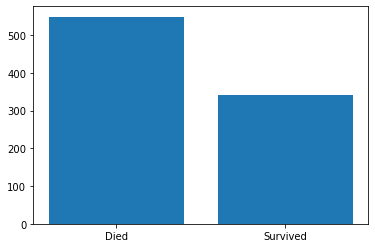

In [33]:
plt.bar(["Died", "Survived"], survived.value_counts())

### `Pclass`

A proxy for socio-economic status (SES). 1 = Upper, 2 = Middle, 3 = Lower

In [35]:
pclass = data_explore["Pclass"]
pclass

PassengerId
1      3
2      1
3      3
4      1
5      3
      ..
887    2
888    1
889    3
890    1
891    3
Name: Pclass, Length: 891, dtype: int64

In [48]:
na_info(data_explore).loc["Pclass"]

Total         0.0
Percentage    0.0
Name: Pclass, dtype: float64

In [36]:
np.sort(pd.unique(pclass))

array([1, 2, 3])

In [40]:
pclass_value_counts = pclass.value_counts()
pclass_value_counts

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [43]:
pclass_value_counts.rename({1: "Upper Class", 2: "Middle Class", 3: "Lower Class"}, inplace=True)
pclass_value_counts

Lower Class     491
Upper Class     216
Middle Class    184
Name: Pclass, dtype: int64

In [44]:
pclass_value_counts.index

Index(['Lower Class', 'Upper Class', 'Middle Class'], dtype='object')

<BarContainer object of 3 artists>

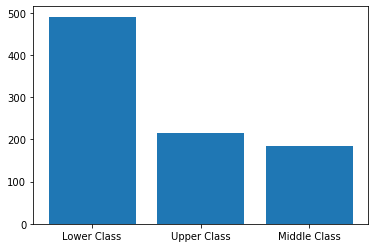

In [45]:
plt.bar(pclass_value_counts.index, pclass_value_counts)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

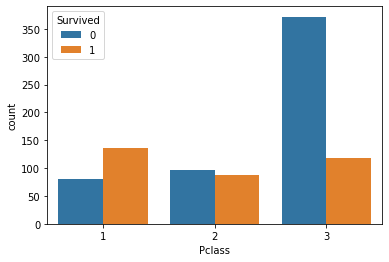

In [70]:
sns.countplot(x="Pclass", hue="Survived", data=data_explore)

### `Name`

In [49]:
name = data_explore["Name"]
name

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [55]:
# No missing data
na_info(data_explore).loc["Name"]

Total         0.0
Percentage    0.0
Name: Name, dtype: float64

In [54]:
# All names are unique
len(np.sort(pd.unique(name)))

891

### `Sex`

In [56]:
sex = data_explore["Sex"]
sex

PassengerId
1        male
2      female
3      female
4      female
5        male
        ...  
887      male
888    female
889    female
890      male
891      male
Name: Sex, Length: 891, dtype: object

In [58]:
# No missing data
na_info(data_explore).loc["Sex"]

Total         0.0
Percentage    0.0
Name: Sex, dtype: float64

In [60]:
# Sex is always either "female" or "male"
np.sort(pd.unique(sex))

array(['female', 'male'], dtype=object)

In [61]:
sex_value_counts = sex.value_counts()
sex_value_counts

male      577
female    314
Name: Sex, dtype: int64

<BarContainer object of 2 artists>

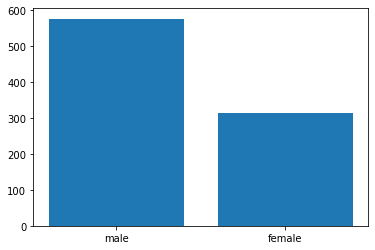

In [62]:
plt.bar(sex_value_counts.index, sex_value_counts)

<AxesSubplot:xlabel='Sex', ylabel='count'>

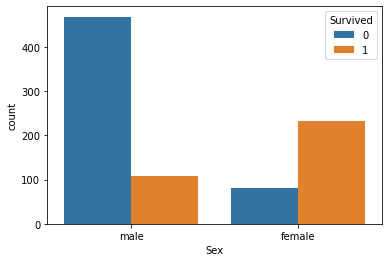

In [68]:
sns.countplot(x="Sex", hue="Survived", data=data_explore)

### `Age`

In [75]:
age = data_explore["Age"]
age

PassengerId
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
       ... 
887    27.0
888    19.0
889     NaN
890    26.0
891    32.0
Name: Age, Length: 891, dtype: float64

In [72]:
# Almost 20 % missing data
na_info(data_explore).loc["Age"]

Total         177.000000
Percentage      0.198653
Name: Age, dtype: float64

In [76]:
np.sort(pd.unique(age))

array([ 0.42,  0.67,  0.75,  0.83,  0.92,  1.  ,  2.  ,  3.  ,  4.  ,
        5.  ,  6.  ,  7.  ,  8.  ,  9.  , 10.  , 11.  , 12.  , 13.  ,
       14.  , 14.5 , 15.  , 16.  , 17.  , 18.  , 19.  , 20.  , 20.5 ,
       21.  , 22.  , 23.  , 23.5 , 24.  , 24.5 , 25.  , 26.  , 27.  ,
       28.  , 28.5 , 29.  , 30.  , 30.5 , 31.  , 32.  , 32.5 , 33.  ,
       34.  , 34.5 , 35.  , 36.  , 36.5 , 37.  , 38.  , 39.  , 40.  ,
       40.5 , 41.  , 42.  , 43.  , 44.  , 45.  , 45.5 , 46.  , 47.  ,
       48.  , 49.  , 50.  , 51.  , 52.  , 53.  , 54.  , 55.  , 55.5 ,
       56.  , 57.  , 58.  , 59.  , 60.  , 61.  , 62.  , 63.  , 64.  ,
       65.  , 66.  , 70.  , 70.5 , 71.  , 74.  , 80.  ,   nan])

In [77]:
len(np.sort(pd.unique(age)))

89

<AxesSubplot:xlabel='Age', ylabel='count'>

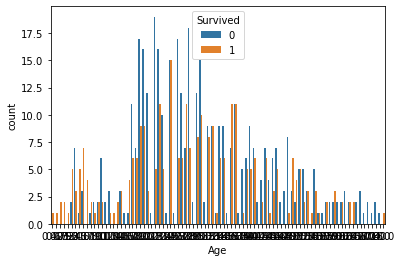

In [78]:
sns.countplot(x="Age", hue="Survived", data=data_explore)

In [79]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

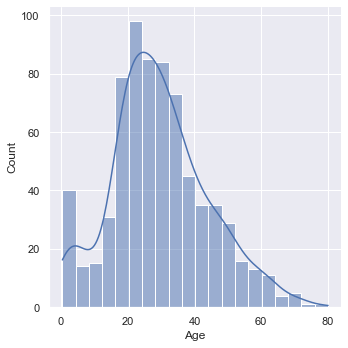

In [82]:
sns.displot(data_explore, x="Age", kde=True)

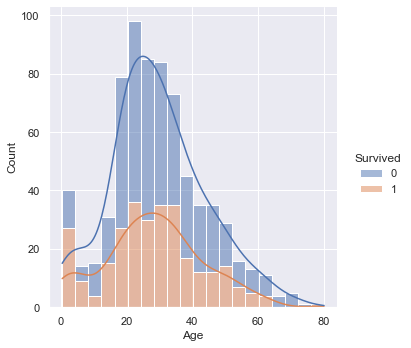

In [85]:
sns.displot(data_explore, x="Age", hue="Survived", multiple="stack", kde=True)

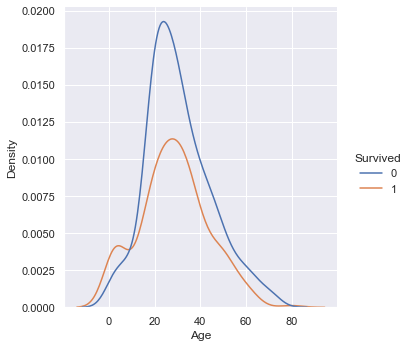

In [86]:
sns.displot(data_explore, x="Age", hue="Survived", kind="kde")

In [122]:
# Drop the rows for which we have no age data
data_explore_tr = data_explore[data_explore["Age"].notna()].copy(deep=True)

In [124]:
bins = [0.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, np.inf]
labels = ["0+", "10+", "20+", "30+", "40+", "50+", "60+", "70+"]
data_explore_tr["AgeGroup"] = pd.cut(data_explore_tr["Age"], bins=bins, labels=labels, include_lowest=True)
data_explore_tr

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20+
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30+
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20+
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30+
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30+
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,30+
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,20+
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,10+


<AxesSubplot:xlabel='AgeGroup', ylabel='count'>

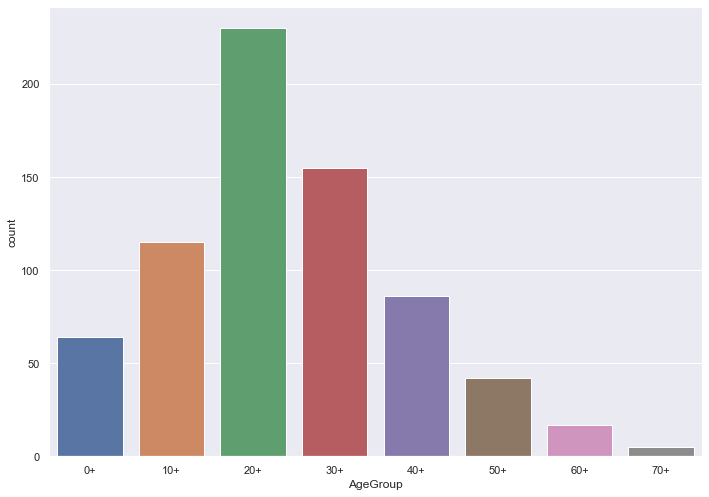

In [146]:
sns.countplot(x="AgeGroup", data=data_explore_tr)

<AxesSubplot:xlabel='AgeGroup', ylabel='count'>

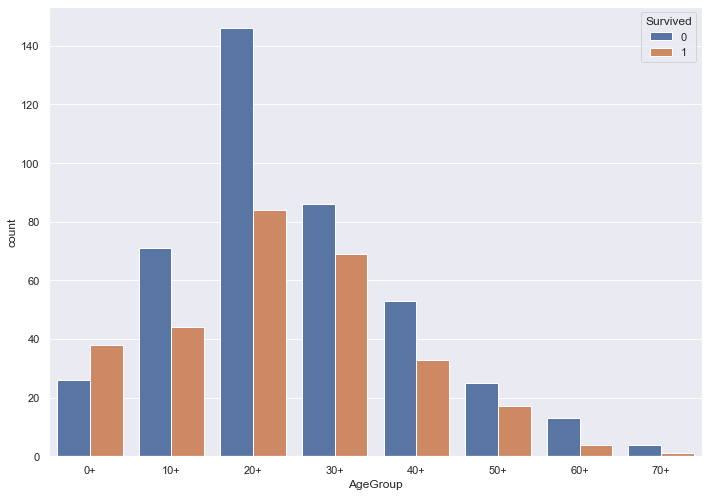

In [148]:
sns.countplot(x="AgeGroup", hue="Survived", data=data_explore_tr)

In [174]:
survivors_by_age_group = data_explore_tr.groupby("AgeGroup")["Survived"].sum()
survivors_by_age_group

AgeGroup
0+     38
10+    44
20+    84
30+    69
40+    33
50+    17
60+     4
70+     1
Name: Survived, dtype: int64

In [175]:
passengers_by_age_group = data_explore_tr.groupby("AgeGroup")["Survived"].count()
passengers_by_age_group

AgeGroup
0+      64
10+    115
20+    230
30+    155
40+     86
50+     42
60+     17
70+      5
Name: Survived, dtype: int64

In [177]:
percentage_survivors = survivors_by_age_group / passengers_by_age_group
percentage_survivors

AgeGroup
0+     0.593750
10+    0.382609
20+    0.365217
30+    0.445161
40+    0.383721
50+    0.404762
60+    0.235294
70+    0.200000
Name: Survived, dtype: float64

<AxesSubplot:xlabel='AgeGroup', ylabel='Survived'>

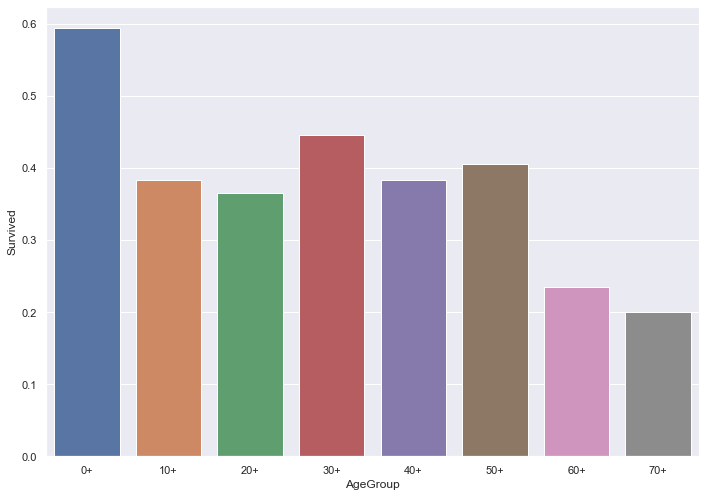

In [179]:
sns.barplot(x=percentage_survivors.index, y=percentage_survivors)

In [162]:
data_explore_tr.groupby(["AgeGroup", "Survived"])["Name"].count()

AgeGroup  Survived
0+        0            26
          1            38
10+       0            71
          1            44
20+       0           146
          1            84
30+       0            86
          1            69
40+       0            53
          1            33
50+       0            25
          1            17
60+       0            13
          1             4
70+       0             4
          1             1
Name: Name, dtype: int64

### `SibSp`

Number of siblings / spouses aboard the Titanic. The dataset defines family relations in this way:

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

This is a little weird, but you basically get a number of *either* siblings *or* spouses.

In [183]:
sibsp = data_explore["SibSp"]
sibsp

PassengerId
1      1
2      1
3      0
4      1
5      0
      ..
887    0
888    0
889    1
890    0
891    0
Name: SibSp, Length: 891, dtype: int64

In [185]:
# No missing data
na_info(data_explore).loc["SibSp"]

Total         0.0
Percentage    0.0
Name: SibSp, dtype: float64

In [186]:
np.sort(pd.unique(sibsp))

array([0, 1, 2, 3, 4, 5, 8])

<AxesSubplot:xlabel='SibSp', ylabel='count'>

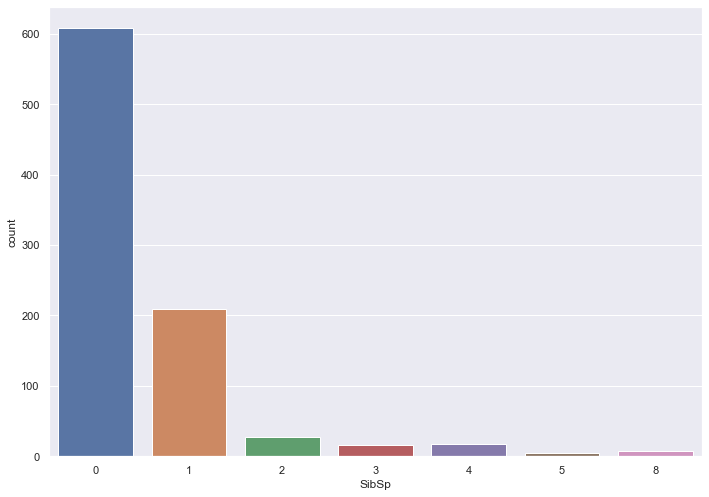

In [187]:
sns.countplot(x="SibSp", data=data_explore)

This feels sketchy. Looks like the vast majority of passengers came without siblings *or* spouses? Let’s try to verify this.

In [200]:
no_siblings_or_spouses = (sibsp == 0).sum()
no_siblings_or_spouses

608

In [202]:
passenger_count = len(sibsp)
passenger_count

891

In [204]:
percentage_without_siblings_or_spouses = no_siblings_or_spouses / passenger_count
percentage_without_siblings_or_spouses

0.6823793490460157

### `Parch`

Number of parents / children aboard the Titanic. The dataset defines family relations in this way:

- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
- Some children travelled only with a nanny, therefore parch=0 for them.

In [206]:
parch = data_explore["Parch"]
parch

PassengerId
1      0
2      0
3      0
4      0
5      0
      ..
887    0
888    0
889    2
890    0
891    0
Name: Parch, Length: 891, dtype: int64

In [207]:
# No missing data
na_info(data_explore).loc["Parch"]

Total         0.0
Percentage    0.0
Name: Parch, dtype: float64

In [208]:
np.sort(pd.unique(sibsp))

array([0, 1, 2, 3, 4, 5, 8])

<AxesSubplot:xlabel='Parch', ylabel='count'>

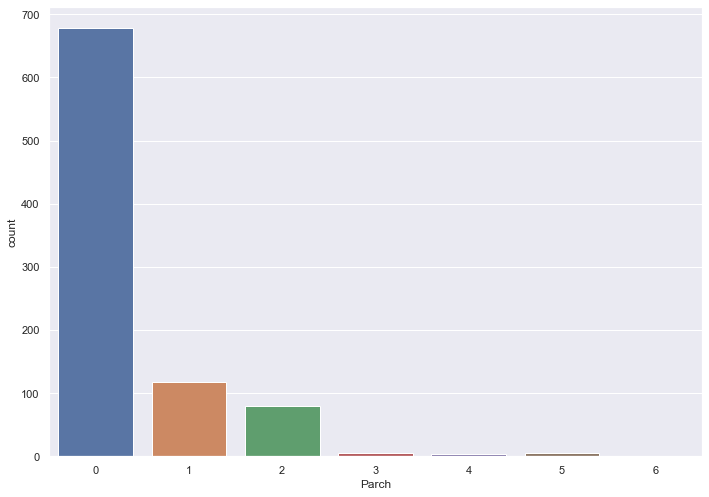

In [209]:
sns.countplot(x="Parch", data=data_explore)

<AxesSubplot:xlabel='Parch', ylabel='count'>

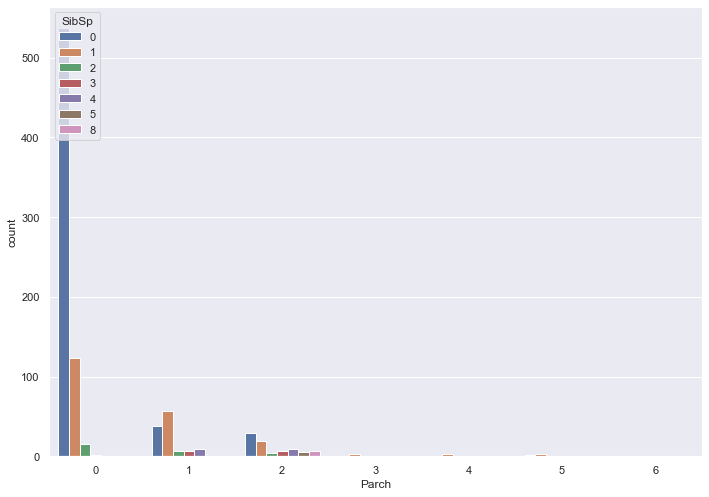

In [210]:
sns.countplot(x="Parch", hue="SibSp", data=data_explore)

<AxesSubplot:xlabel='Parch', ylabel='count'>

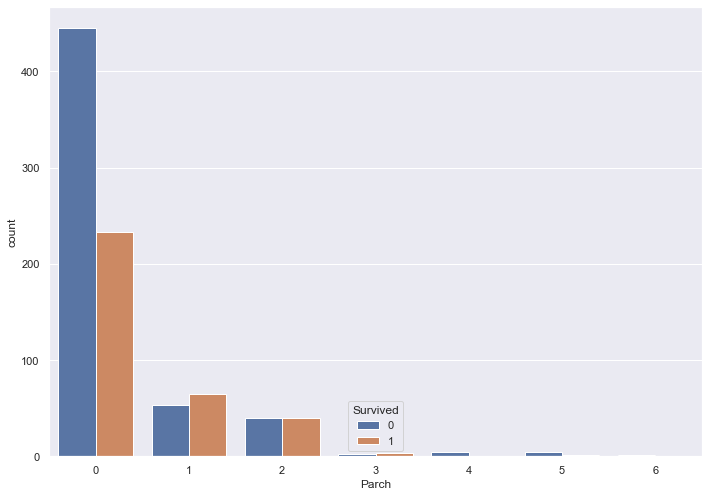

In [213]:
sns.countplot(x="Parch", hue="Survived", data=data_explore)

In [214]:
survivors_by_parch = data_explore_tr.groupby("Parch")["Survived"].sum()
survivors_by_parch

Parch
0    186
1     61
2     39
3      3
4      0
5      1
6      0
Name: Survived, dtype: int64

In [215]:
passengers_by_parch = data_explore_tr.groupby("Parch")["Survived"].count()
passengers_by_parch

Parch
0    521
1    110
2     68
3      5
4      4
5      5
6      1
Name: Survived, dtype: int64

In [216]:
percentage_survivors_parch = survivors_by_parch / passengers_by_parch
percentage_survivors_parch

Parch
0    0.357006
1    0.554545
2    0.573529
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

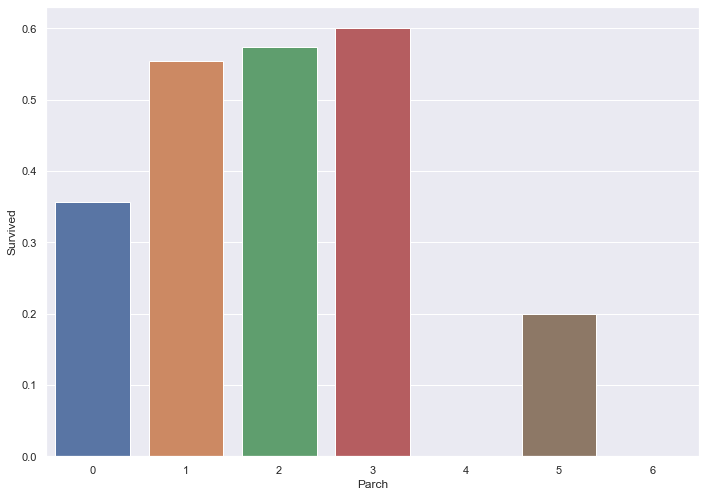

In [217]:
sns.barplot(x=percentage_survivors_parch.index, y=percentage_survivors_parch)

Okay, so if you have 1–3 parents or children your chance of survival goes up? Interesting.

### `Ticket`

Ticket number

In [218]:
ticket = data_explore["Ticket"]
ticket

PassengerId
1             A/5 21171
2              PC 17599
3      STON/O2. 3101282
4                113803
5                373450
             ...       
887              211536
888              112053
889          W./C. 6607
890              111369
891              370376
Name: Ticket, Length: 891, dtype: object

In [219]:
# No missing data
na_info(data_explore).loc["Ticket"]

Total         0.0
Percentage    0.0
Name: Ticket, dtype: float64

### `Fare`

Passenger fare

In [220]:
fare = data_explore["Fare"]
fare

PassengerId
1       7.2500
2      71.2833
3       7.9250
4      53.1000
5       8.0500
        ...   
887    13.0000
888    30.0000
889    23.4500
890    30.0000
891     7.7500
Name: Fare, Length: 891, dtype: float64

In [225]:
print("Mean: %0.2f, min: %0.2f, max: %0.2f" % (fare.mean(), fare.min(), fare.max()))

Mean: 32.20, min: 0.00, max: 512.33


In [229]:
print(fare[fare == 0], f", count: {len(fare[fare == 0])}")

PassengerId
180    0.0
264    0.0
272    0.0
278    0.0
303    0.0
414    0.0
467    0.0
482    0.0
598    0.0
634    0.0
675    0.0
733    0.0
807    0.0
816    0.0
823    0.0
Name: Fare, dtype: float64 , count: 15


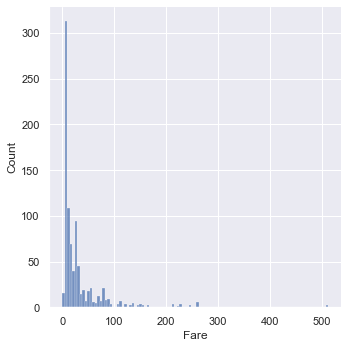

In [230]:
sns.displot(x="Fare", data=data_explore)

Can’t see much in the plot above, because there are so many cheap tickets. Let’s try to plot something easier to analyze.

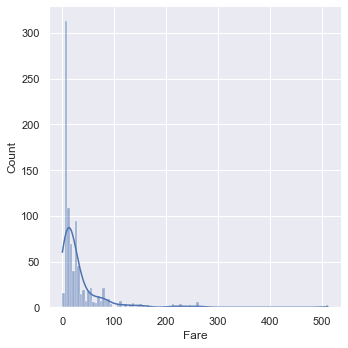

In [231]:
sns.displot(x="Fare", data=data_explore, kde=True)

Some tickets had a fare of `0.0`, so I won’t be able to use log_scale with Seaborn. However, NumPy offers `math.log1p` which returns the natural logarithm of 1+x (base e). Let’s give it a try:

In [249]:
data_explore_tr = data_explore.copy(deep=True)
data_explore_tr["Fare"] = np.log1p(data_explore_tr["Fare"])

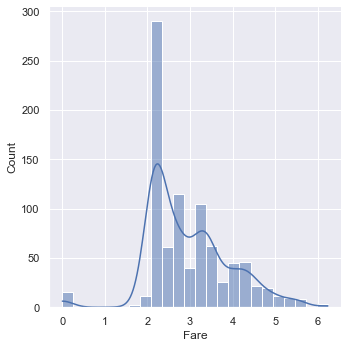

In [250]:
sns.displot(x="Fare", data=data_explore_tr, kde=True)

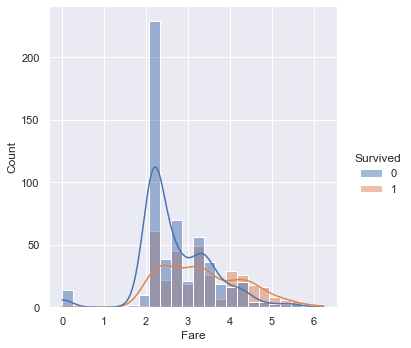

In [251]:
sns.displot(x="Fare", hue="Survived", data=data_explore_tr, kde=True)

### `Pclass`

**Pclass**

> A proxy for socio-economic status (SES):
> - 1st = Upper
> - 2nd = Middle
> - 3rd = Lower
```
>>> np.sort(pd.unique(df["Pclass"]))
array([1, 2, 3])
```

**Name**

The name of the passenger.


**Sex**

> Sex
```
>>> np.sort(pd.unique(df["Sex"]))
array(['female', 'male'], dtype=object)
```

**Age**

> Age in years. Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
```
>>> np.sort(pd.unique(df["Age"]))
array([ 0.42,  0.67,  0.75,  0.83,  0.92,  1.  ,  2.  ,  3.  ,  4.  ,
        5.  ,  6.  ,  7.  ,  8.  ,  9.  , 10.  , 11.  , 12.  , 13.  ,
       14.  , 14.5 , 15.  , 16.  , 17.  , 18.  , 19.  , 20.  , 20.5 ,
       21.  , 22.  , 23.  , 23.5 , 24.  , 24.5 , 25.  , 26.  , 27.  ,
       28.  , 28.5 , 29.  , 30.  , 30.5 , 31.  , 32.  , 32.5 , 33.  ,
       34.  , 34.5 , 35.  , 36.  , 36.5 , 37.  , 38.  , 39.  , 40.  ,
       40.5 , 41.  , 42.  , 43.  , 44.  , 45.  , 45.5 , 46.  , 47.  ,
       48.  , 49.  , 50.  , 51.  , 52.  , 53.  , 54.  , 55.  , 55.5 ,
       56.  , 57.  , 58.  , 59.  , 60.  , 61.  , 62.  , 63.  , 64.  ,
       65.  , 66.  , 70.  , 70.5 , 71.  , 74.  , 80.  ,   nan])
```

**SibSp**

> \# of siblings / spouses aboard the Titanic. The dataset defines family relations in this way:

> Sibling = brother, sister, stepbrother, stepsister

> Spouse = husband, wife (mistresses and fiancés were ignored)

This is a little weird, but you basically get a number of *either* siblings *or* spouses:
```
>>> np.sort(pd.unique(df["SibSp"]))
array([0, 1, 2, 3, 4, 5, 8])
```

**Parch**

> \# of parents / children aboard the Titanic. The dataset defines family relations in this way:

> - Parent = mother, father
> - Child = daughter, son, stepdaughter, stepson
> - Some children travelled only with a nanny, therefore parch=0 for them.
```
>>> np.sort(pd.unique(df["Parch"]))
array([0, 1, 2, 3, 4, 5, 6])
```

**Ticket**

> Ticket number

**Fare**

> Passenger fare

**Cabin**

> Cabin number

**Embarked**

> Port of embarkation
> - C = Cherbourg
> - Q = Queenstown
> - S = Southampton
```
>>> pd.unique(df["Embarked"])
array(['S', 'C', 'Q', nan], dtype=object)
```

In [15]:
data_explore.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 4. For supervised learning tasks, identify the target attribute(s).

### 5 Visualize the data.

### 6. Study the correlations between attributes.

### 7. Study how you would solve the problem manually.

### 8. Identify the promising transformations you may want to apply.

### 9. Identify extra data that would be useful (go back to [Get the Data.](#get-the-data) ).

### 10. Document what you have learned.

<a name="prepare-the-data"/>

## 4. Prepare the Data

*Notes*: 
- Work on copies of the data (keep the original dataset intact).
- Write functions for all data transformations you apply, for five reasons:
  - So you can easily prepare the data the next time you get a fresh dataset
  - So you can apply these transformations in future projects
  - To clean and prepare the test set
  - To clean and prepare new data instances once your solution is live
  - To make it easy to treat your preparation choices as hyperparameters

### 1. Data cleaning

#### 1a. Fix or remove outliers (optional).

#### 1b. Fill in missing values (e.g., with zero, mean, median…) or drop their rows (or columns).

### 2. Feature selection (optional)

Drop the attributes that provide no useful information for the task.

### 3. Feature engineering, where appropriate

#### 3a. Discretize continuous features.

#### 4b. Decompose features (e.g., categorical, date/time, etc.).

#### 4c. Add promising transformations of features (e.g., log( x ), sqrt( x ), x 2 , etc.).

#### 4d. Aggregate features into promising new features.

### 4. Feature scaling

Standardize or normalize features.

<a name="shortlist-promising-models"/>

## 5. Shortlist Promising Models

*Notes*: 
- If the data is huge, you may want to sample smaller training sets so you can train many different models in a reasonable time (be aware that this penalizes complex models such as large neural nets or Random Forests).
- Once again, try to automate these steps as much as possible.

### 1. Train many quick-and-dirty models from different categories (e.g., linear, naive Bayes, SVM, Random Forest, neural net, etc.) using standard parameters.

### 2. Measure and compare their performance.

For each model, use N fold cross-validation and compute the mean and standard deviation of the performance measure on the N folds.

### 3. Analyze the most significant variables for each algorithm.

### 4. Analyze the types of errors the models make.

What data would a human have used to avoid these errors?

### 5. Perform a quick round of feature selection and engineering.

### 6. Perform one or two more quick iterations of the five previous steps.

### 7. Shortlist the top three to five most promising models, preferring models that make different types of errors.

<a name="fine-tune-the-system"/>

## 6. Fine-Tune the System

*Notes*: 
- You will want to use as much data as possible for this step, especially as you move toward the end of fine-tuning.
- As always, automate what you can.

### 1. Fine-tune the hyperparameters using cross-validation

- Treat your data transformation choices as hyperparameters, especially when you are not sure about them (e.g., if you’re not sure whether to replace missing values with zeros or with the median value, or to just drop the rows).
- Unless there are very few hyperparameter values to explore, prefer random search over grid search. If training is very long, you may prefer a Bayesian optimization approach (e.g., using Gaussian process priors, as described by Jasper Snoek et al.).

### 2. Try Ensemble methods. Combining your best models will often produce better performance than running them individually.

### 3. Once you are confident about your final model, measure its performance on the test set to estimate the generalization error.

**Warning 🛑**

Don’t tweak your model after measuring the generalization error: you would just start overfitting the test set. 

<a name="present-your-solution"/>

## 7. Present your solution

### 1. Document what you have done.

### 2. Create a nice presentation.

Make sure you highlight the big picture first.

### 3. Explain why your solution achieves the business objective.

### 4. Don’t forget to present interesting points you noticed along the way.

- Describe what worked and what did not.
- List your assumptions and your system’s limitations.

### 5. Ensure your key findings are communicated through beautiful visualizations or easy-to-remember statements (e.g., “the median income is the number-one predictor of housing prices”).

<a name="launch"/>

## 8. Launch!

### 1. Get your solution ready for production (plug into production data inputs, write unit tests, etc.).

### 2. Write monitoring code to check your system’s live performance at regular intervals and trigger alerts when it drops.

- Beware of slow degradation: models tend to “rot” as data evolves.
- Measuring performance may require a human pipeline (e.g., via a crowdsourcing service).
- Also monitor your inputs’ quality (e.g., a malfunctioning sensor sending random values, or another team’s output becoming stale). This is particularly important for online learning systems.

### 3. Retrain your models on a regular basis on fresh data (automate as much as possible ).